# 9. 정책경사법

지금가지 Q러닝, SARSA, 몬테카를로법 등을 배웠습니다. 이 기법들은 크게 보면 가치 기반 기법으로 분류할 수 있습니다. 여기서 말하는 '가치'는 행동 가치 함수(Q함수)나 상태가치 함수를 뜻합니다. 가치 기반 기법은 가치함수를 모델링하고 가치 함수를 학습합니다. 그리고 가치 함수를 '경유'하여 정책을 얻습니다.

> NOTE_ 가치 기반 기법에서는 '일반화한 정책 반복'이라는 아이디어를 바탕으로 최적 정책을 찾는 경우가 많습니다. 가치 함수 평가와 정책 개선을 반복하면서 조금씩 최적 정책에 가까워지는 것입니다.

또 다른 전략으로 정책 경사법에 기반한 알고리즘도 다양하게 제안되고 있습니다. 이번 장에서는 가장 간단한 정책 경사법을 살펴본 다음 조금씩 개선합니다. 먼저 REINFORCE 알고리즘을 도출합니다. 그런 다음 한 걸음 나아가 '베이스라인이 추가된 REINFORCE'와 '행위자-비평자'기법까지 알아봅니다.

## 9.1 가장 간단한 정책 경사법

정책 경사법은 경사, 즉 기울기를 이용하여 정책을 갱신하는 기법들의 총칭입니다. 정책 경사법 기반의 알고리즘은 여러 가지가 있지만 이번 절에서는 가장 간단한 정책 경사법을 도출해보겠습니다.

### 9.1.1 정책 경사법 도출

확률적 정책은 수식으로 $\pi(a|s)$로 표현합니다. $\pi(a|s)$는 상태 s에서 a라는 행동을 취할 확률입니다. 이번 장에서는 정책을 신경망으로 모델링합니다. 이를 위해 신경망의 가중치 매개변수 전체를 기호로 집약하여 표현하기로 하죠. $\theta$는 모든 매개변수의 원소들을 한 줄로 나열한 벡터입니다. 그리고 신경망으로 구현한 정책을 $\pi(a|s)$로 표현하겠습니다.

다음으로 정책 $\pi_{\theta}$를 이용하여 목적 함수를 설정합니다. 목적 함수를 설정하면 이후 목적 함수 의 값을 가장 크게 만드는 매개변수 를 찾아야 합니다. 이 일이 '최적화'라고 불리는 작업이며 일반적인 신경망 학습 과정을 말합니다.
> NOTE_ 최적화 문제를 풀 때 이번 장에서는 일반적으로 쓰이는 손실 함수 대신 목적 함수를 설정합니다. 손실 함수는 경사하강법으로 최솟값을 찾습니다. 반면 목적 함수는 경사 상승법으로 최댓값을 찾습니다. 경사 하강법은 기울기에 마이너스를 곱한 방향으로, 경사 상승법은 플러스를 곱한 방향으로 매개변수를 갱신합니다. 단, 목적 함수에 마이너스를 붙이면 손실 함수로 취급할 수 있으므로(반대도 마찬가지) 손실 함수와 목적 함수는 본질적으로 같은 역할을 합니다.

그럼 정책 $\pi_{\theta}$를 사용하여 목적 함수를 설정해보겠습니다. 먼저 문제 설정을 명확히 합시다. 일회성 과제이고 행동은 정책$\pi_{\theta}$에 따라 선택한다고 해보죠. 그리고 매 행동의 결과로 다음과 같이 '상태, 행동, 보상'으로 구성된 시계열 데이터를 얻었다고 가정합니다.

<p align="center"><img src="./images/eq_09_00_1.png" width=400></p>

$\tau$(타우)는 궤적 trajectory 경로을 뜻합니다. 이때 수익은 할인율을 이용하여 다음 식으로 표현할 수 있습니다.

<p align="center"><img src="./images/eq_09_00_2.png" width=400></p>


수익을 $\tau$로부터 계산할 수 있음을 명시하기 위해 $G(\tau)$로 표기했습니다. 이때 목적 함수 $J(\theta)$는 다음 식으로 표현됩니다.

<p align="center"><img src="./images/eq_09_00_3.png" width=300></p>

수익 $G(\tau)$는 확률적으로 변하기 때문에 그 기댓값이 목적 함수가 됩니다. 지금 식에서 기댓값 E의 첨자로 '$\tau$ ~ $\pi_{\theta}$'가 붙어 있습니다. 시계열 데이터 $\tau$가 정책 $\pi_{\theta}$로부터 생성됨을 뜻하는 표기 방식입니다.  
> NOTE_ $\tau$의 생성 과정에는 에이전트의 정책 외에도 환경의 상태 전이 확률 p(s', s, a)와 보상 함수 r(s, a, s')도 관여합니다. 그러나 우리가 통제할 수 있는 요인은 에이전트의 정책뿐입니다. 그래서 E~[...]와 같이 '$\tau$ ~ $\pi_{\theta}$'로만 표기하기로 합니다. 

목적 함수가 정해지면 다음으로 그 기울기를 구합니다. 매개변수 $\theta$에 대한 기울기를 $▼_\theta$로 표현합니다. 우리의 목표는 $▼_\theta J(\theta)$를 구하는 것이고 결과는 [식 9.1]입니다. 도출 과정은 부록 D.1절에서 설명하니 관심 있는 분은 참고하기 바랍니다.

<p align="center"><img src="./images/eq_09_01.png" width=800></p>

이 식에서 주목할 점은 $▼_\theta$가 E 안에 들어있다는 점인데 (기울기 계산은 $▼_\theta log\pi_\theta(A_t|S_t)$로 이루어집니다) 이와 관련해서는 바로 뒤에서 자세히 살펴보겠습니다.  

$▼_\theta J(\theta)$ 구해지면 이어서 신경망의 매개변수를 갱신합니다. 적용할 수 있는 최적화 방법은 다양하며, 경사 상승법에 따른 간단한 방법을 다음 식으로 표현할 수 있습니다.

<p align="center"><img src="./images/eq_09_01_1.png" width=300></p>


이 식과 같이 매개변수 $\theta$를 기울기 방향으로 $\alpha$만큼 갱신합니다. 여기서 $\alpha$는 학습률입니다.

### 9.1.2 정책 경사법 알고리즘


$▼_\theta J(\theta)$는 [식 9.1]과 같이 기댓값으로 표현됩니다. 이 기댓값은 몬테카를로법으로 구할 수 있습니다. 몬테카를로법은 샘플링을 여러 번 하여 평균을 구하는 방법입니다. 에이전트를 정책 $\pi_{\theta}$에 따라 실제로 행동하게 하여 n개의 궤적 $\tau$를 얻었다고 가정하죠. 이때 각 $\tau$에서 기댓값, 즉 [식 9.1]의 내용을 계산하고 평균을 구하면 $▼_\theta J(\theta)$를 근사할 수 있습니다. 수식으로는 다음과 같이 표현됩니다.

<p align="center"><img src="./images/eq_09_02_0.png" width=400></p>

이 식에서 i번째 에피소드에서 얻은 궤적을 $\tau^{(i)}$, i번째 에피소드의 시간 t에서의 행동을 $A_t^{(i)}$, 상태를 $S_t^{(i)}$로 표현했습니다.  

참고로 몬테카를로의 샘플 수가 1개일 때, 즉 앞의 식에서 n = 1일 때를 생각해봅시다. 이런 경우는 다음과 같이 단순화할 수 있습니다.

<p align="center"><img src="./images/eq_09_02.png" width=800></p>

이번 장에서는 원리를 이해하기 쉽도록 [식 9.2]를 대상으로 한 정책 경사법을 다룰 것입니다. [식 9.2]는 $▼_\theta log\pi_\theta(A_t|S_t)$를 모든 시간(t=0 ~ T)에서 구하고, 각 기울기에 수익 $G(\tau)$ 를 '가중치'로 곱하여 모두 더합니다. 이 계산 과정을 시각화하면 [그림 9-1]과 같습니다.

<p align="center"><img src="./images/fig_09_01.png" width=800></p>

이제 [그림 9-1]에서 수행하는 계산의 '의미'를 생각해봅시다. 우선 log의 미분으로 다음의 식이 성립합니다.

<p align="center"><img src="./images/eq_09_02_1.png" width=400></p>

이 식과 같이 $▼_\theta log\pi_\theta(A_t|S_t)$는 $▼_\theta\pi_\theta(A_t|S_t)$라는 기울기 (벡터)에 $1/\pi_\theta(A_t|S_t)$을 곱한 
것입니다.  

이로부터 $▼_\theta log\pi_\theta(A_t|S_t)$와 $▼_\theta\pi_\theta(A_t|S_t)$는 같은 방향을 가리킨다는 사실을 알 수 있습니다.  

$▼_\theta\pi_\theta(A_t|S_t)$는 상태 $S_t$에서 행동 $A_t$를 취할 확률이 가장 높아지는 방향을 가리킵니다.  

마찬가지로 $▼_\theta log\pi_\theta(A_t|S_t)$도 상태 $S_t$에서 행동 $A_t$를 취할 확률이 가장 높아 지는 방향을 가리키죠.  

그 방향에 대해 식 $G(\tau)▼_\theta log\pi_\theta(A_t|S_t)$와 같이 $G(\tau)$라는 '가중치' 가 곱해집니다.  

예를 들어 에이전트가 수익 $G(\tau)$로 100을 얻었다고 해보죠. 그렇다면 수익을 얻도록 해준 직전 행동이 더 잘 선택되도록 기울기를 조절해야 하니, 가중치를 100만큼 주어 강화한다는 뜻입니다. 즉, 선택의 결과가 좋았다면 그만큼 직전 행동을 강화한다는 뜻입니다. 반대로 좋지 않은 선택에 대해서는 직전 행동을 그만큼 약화시킵니다.

### 9.1.3 정책 경사법 구현

정책 경사법을 구현하는 가장 간단한 방법을 알아보겠습니다. 먼저 import문과 정책을 표현하 는 신경망 코드를 보여드리죠.

In [50]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class Policy(Model):
    def __init__(self, action_size):
        super().__init__()
        self.l1 = L.Linear(128)          # 첫 번째 계층
        self.l2 = L.Linear(action_size)  # 두 번째 계층

    def forward(self, x):
        x = F.relu(self.l1(x))     # 첫 번째 계층에서는 ReLU 함수 사용
        x = F.softmax(self.l2(x))  # 두 번째 계층에서는 소프트맥스 함수 사용
        return x

정책 신경망을 2층의 완전 연결 모델로 구현했습니다. 최종 출력의 원소 수는 행동의 수 (action_size)로 설정합니다. 최종 출력은 소프트맥스 함수의 출력이므로 결국 각 행동의 확률을 얻을 수 있습니다.

다음은 Agent 클래스 차례입니다. 먼저 초기화 메서드와 get_action() 메서드를 보겠습니다.

In [51]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)        # 순전파 수행
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)  # 행동 선택
        return action, probs[action]  # 선택된 행동과 확률 반환

get_action() 메서드는 상태 state에서의 행동을 결정합니다. 이를 위해 self.pi(state)로 신경망의 순전파를 수행하여 확률 분포 probs를 얻습니다. 그런 다음 이 확률 분포에 따라 하나의 행동을 샘플링합니다. 그리고 선택된 행동과 함께 그 행동의 확률도 반환합니다(지금 코드 에서는 probs[action]).  

이제 get_action() 메서드를 사용해봅시다.

In [52]:
env = gym.make('CartPole-v0', render_mode='rgb_array')
state = env.reset()[0]
agent = Agent()

action, prob = agent.get_action(state)
print('행동:', action)
print('확률:', prob)

G = 100.0 # 더미 가중치
J = G * F.log(prob) # type: ignore
print('J:', J)

# 기울기 구하기
J.backward()

행동: 0
확률: variable(0.50699174)
J: variable(-67.92605519294739)


이 코드는 초기 상태에서의 행동과 그 확률을 출력합니다. 또한 더미 가중치를 적용하여 다음 식으로 표현되는 기울기를 구하는 코드도 보여줍니다([식 9.2]에서 t = 0일 때의 항을 추출한 식입니다).

$$G(\tau)▼_\theta log\pi_\theta(A_t|S_t)$$

참고로 이 코드에 등장하는 변수들은 각각 다음 수식에 해당합니다.
- prob(Dezero.Variable): $\pi_\theta(A_0|S_0)
- G(float): $G(\tau)$
- J(Dezero.Variable): $G(\tau)log\pi_\theta(A_0|S_0)$

J가 구해지면 J.backward()를 실행하여 $G(\tau)▼_\theta log\pi_\theta(A_0|S_0)$을 구합니다.  

이어서 Agent 클래스의 나머지 코드를 보겠습니다.

In [53]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)        # 순전파 수행
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)  # 행동 선택
        return action, probs[action]  # 선택된 행동과 확률 반환

    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):  # 수익 G 계산
            G = reward + self.gamma * G

        for reward, prob in self.memory:  # 손실 함수 계산
            loss += -F.log(prob) * G # type: ignore

        loss.backward()
        self.optimizer.update()
        self.memory = []  # 메모리 초기화

add() 메서드는 에이전트가 행동을 취해 보상을 얻을 때마다 호출됩니다. 이 메서드에서는 보상(reward)과 에이전트가 취한 행동의 확률(prob)을 메모리(self.memory)에 저장합니다.  

update() 메서드는 에이전트가 목표에 도달했을 때 호출됩니다. 먼저 수익 G를 계산합니다. 수익은 획득한 보상을 역방향으로 추적하면 효율적으로 계산할 수 있습니다(원리는 5.2.3절 참고). 그런 다음 손실 함수를 계산합니다. 각 시간에서의 -F.log(prob)를 구하고 가중치로 G를 곱하여 모두 더하면 됩니다. 나머지는 일반적인 신경망 학습과 같습니다.

> CAUTION_ 신경망 학습에서는 보통 손실 함수를 이용합니다. 손실 함수를 설정하려면 목적 함수 $J(\theta)$에 마이너스를 곱하여 $-J(\theta)$로 바꿔주면 됩니다. $-J(\theta)$를 손실 함수로 쓴다면 경사하강법용의 다양한 최적 화기법(SGD, Adam 등)을 활용하여 매개변수를 갱신할 수 있습니다.  


마지막으로 에이전트를 <카트 폴> 환경에서 동작시켜봅시다.

In [28]:
episodes = 3000
env = gym.make('CartPole-v0', render_mode='rgb_array')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)  # 행동 선택
        next_state, reward, terminated, truncated, info = env.step(action)  # 행동 수행
        done = terminated | truncated

        agent.add(reward, prob)  # 보상과 행동의 확률을 에이전트에 추가
        state = next_state       # 상태 전이
        total_reward += reward   # 보상 총합 계산

    agent.update()  # 정책 갱신

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

episode :0, total reward : 14.0
episode :100, total reward : 21.0
episode :200, total reward : 44.0
episode :300, total reward : 23.0
episode :400, total reward : 19.0
episode :500, total reward : 42.0
episode :600, total reward : 35.0
episode :700, total reward : 28.0
episode :800, total reward : 99.0
episode :900, total reward : 87.0
episode :1000, total reward : 129.0
episode :1100, total reward : 42.0
episode :1200, total reward : 143.0
episode :1300, total reward : 40.0
episode :1400, total reward : 126.0
episode :1500, total reward : 61.0
episode :1600, total reward : 82.0
episode :1700, total reward : 79.0
episode :1800, total reward : 93.0
episode :1900, total reward : 134.0
episode :2000, total reward : 55.0
episode :2100, total reward : 31.0
episode :2200, total reward : 93.0
episode :2300, total reward : 59.0
episode :2400, total reward : 83.0
episode :2500, total reward : 87.0
episode :2600, total reward : 93.0
episode :2700, total reward : 200.0
episode :2800, total reward

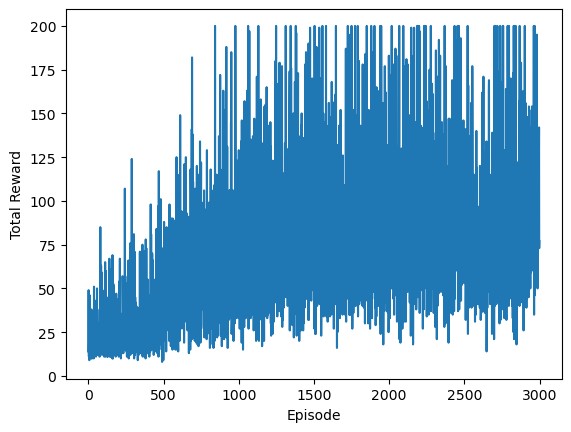

In [30]:
# [그림 9-2] 에피소드별 보상 합계 추이
from common.utils import plot_total_reward
plot_total_reward(reward_history)

익숙한 코드입니다. while문 안에서 1 에이전트가 받은 보상(reward)과 그 보상을 얻게 해준 행동의 확률(prob)을 에이전트에 추가합니다. 그리고 while문을 빠져나오면(에피소드가 끝나면) 2 agent.update()를 호출해 정책을 갱신합니다.  


이 코드를 실행하면 에피소드가 늘어날수록 보상도 늘어납니다. 결과를 그래프로 그리면 다음 과 같습니다.

<p align="center"><img src="./images/fig_09_02.png" width=600></p>

[그림 9-2]에서 볼 수 있듯이 비록 변동은 크지만 에피소드가 진행됨에 따라 결과가 점차 나아집니다. 하지만 단 한 번의 실험 결과이기 때문에 아직 신뢰하기는 어렵습니다. 그래서 같은 실 험을 100번 반복하여 평균한 결과를 보겠습니다.

<p align="center"><img src="./images/fig_09_03.png" width=600></p>

역시나 에피소드를 거듭할수록 보상의 총합이 커지고 있음을 알 수 있습니다. 하지만 3000회까지 진행했음에도 이번 과제의 상한인 200에는 한참 미치지 못합니다. 개선의 여지가 있어 보 이죠? 그래서 다음 절에서는 방금 도출한 가장 간단한 정책 경사법을 개선해보겠습니다.

In [ ]:
for i in range(5):
    # 학습이 끝난 에이전트 렌더링
    env = gym.make('CartPole-v0', render_mode='human')
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)  # 행동 선택
        next_state, reward, terminated, truncated, info = env.step(action)  # 행동 수행
        done = terminated | truncated

        agent.add(reward, prob)  # 보상과 행동의 확률을 에이전트에 추가
        state = next_state       # 상태 전이
        total_reward += reward   # 보상 총합 계산

    env.close()
    print('Total Reward:', total_reward)

## 9.2 REINFORCE

REINFORCE"이는 앞 절의 정책 경사법을 개선한 기법입니다. 먼저 수식으로 REINFORCE 알고리즘을 도출한 다음, 앞 절의 코드를 일부 수정하는 형태로 구현까지 해보겠습니다.

> NOTE_ REINFORCE라는 이름은 '**RE**ward **I**ncrement **N**onnegative **F**actor X **O**ffset **R**einforcement × **C**haracteristic **E**ligibility'의 머리글자를 따서 지었습니다.

### 9.2.1 REINFORCE 알고리즘

앞 절의 내용을 복습해보죠. 가장 간단한 정책 경사법은 [식 9.1]에 따라 구현됩니다.

<p align="center"><img src="./images/eq_09_01.png" width=800></p>

[식 9.1]의 $G(\tau)$는 지금까지 얻은 모든 보상의 총합입니다(정확히는 '할인율을 적용한' 보상의 총합). 여기서 생각해볼 문제가 있습니다.  $G(\tau)▼_\theta log\pi_\theta(A_t|S_t)$ 부분을 보면, 특정 시간 t 에서 행동 $A_t$를 선택할 확률에 '항상 일정한' 가중치 $G(\tau)$를 적용하고 있습니다.  

그런데 좋은 행동인지 나쁜 행동인지는 그 행동 이후에 얻는 보상의 총합으로 평가됩니다(가치 함수의 정의를 떠올려보세요). 행동 '전에' 얻은 보상은 그 행동의 좋고 나쁨과 무관합니다. 예를 들어 특정 시간에 취한 행동 $A_t$를 평가할 때는 그 이전에 무엇을 했고 보상을 얼마나 얻었는지는 중요하지 않습니다. 행동 $A_t$를 하고 난 후 어떤 결과가 나오느냐에 따라, 즉 시간 t 이후에 얻는 보상의 총합에 따라 행동 $A_t$의 좋고 나쁨이 결정됩니다.  


[식 9.1]에서 행동 $A_t$에 대한 가중치는 $G(\tau)$입니다. 이 가중치에는 시간 t 이전의 보상도 포함됩니다. 본질적으로 관련이 없는 보상이 노이즈로 섞여 있다는 뜻입니다. 이 노이즈를 제거 하기 위해 가중치 G(r)를 다음과 같이 변경할 수 있습니다.


<p align="center"><img src="./images/eq_09_03.png" width=800></p>


이와 같이 가중치를 $G_t$로 변경했습니다. 가중치 $G_t$는 시간 t ~ T 동안에 얻는 보상의 총합입 니다. 이제 시간 t 앞의 보상은 포함하지 않는 가중치 $G_t$를 써서 행동 $A_t$가 선택될 확률을 강화할 수 있습니다. 이것이 앞 절의 정책 경사법을 개선하는 아이디어입니다.  

[식 9.3]에 기반한 알고리즘을 REINFORCE라고 합니다. 이 책에서는 [식 9.3]이 성립함을 증명하지는 않습니다. 증명에 관심 있는 분은 다른 문헌[17], [18]을 참고하기 바랍니다.

> NOTE_ [식 9.3]에 기반한 알고리즘인 REINFORCE는 가장 간단한 정책 경사법([식 9.1]에 기반한 알고리 즘)보다 우수합니다. [식 9.1]과 [식 9.3] 모두 샘플 수를 무한히 늘리면 정확한 $▼_\theta J(\theta)$에 수렴합니다(편향 이 없다'고 표현할 수 있죠). 반면 샘플이 흩어진 정도인 '분산'은 [식 9.1]이 더 큽니다. [식 9.1]의 가중치에는 관련 없는 데이터(노이즈)가 섞여 있기 때문입니다.

### 9.2.2 REINFORCE 구현

REINFORCE는 분산이 작기 때문에 데이터 샘플이 적더라도 더 정확하게 근사할 수 있습니다. 실제로 구현하여 얼마나 정확한지 검증해보죠. REINFORCE의 코드는 앞 절의 코드와 거의 같습니다. 다른 점은 Agent 클래스의 update() 메서드뿐입니다. 그럼 무엇이 다른지 함께 보겠습니다.

In [32]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]

    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()
        
        # # 9.1절 내용
        # G, loss = 0, 0
        # for reward, prob in reversed(self.memory):  # 수익 G 계산
        #     G = reward + self.gamma * G

        # for reward, prob in self.memory:  # 손실 함수 계산
        #     loss += -F.log(prob) * G # type: ignore

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G  # 수익 G 계산
            loss += -F.log(prob) * G     # 손실 함수 계산

        loss.backward()
        self.optimizer.update()
        self.memory = []

In [33]:
episodes = 3000
env = gym.make('CartPole-v0', render_mode='rgb_array')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)  # 행동 선택
        next_state, reward, terminated, truncated, info = env.step(action)  # 행동 수행
        done = terminated | truncated

        agent.add(reward, prob)  # 보상과 행동의 확률을 에이전트에 추가
        state = next_state       # 상태 전이
        total_reward += reward   # 보상 총합 계산

    agent.update()  # 정책 갱신

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

episode :0, total reward : 74.0
episode :100, total reward : 14.0
episode :200, total reward : 59.0
episode :300, total reward : 45.0
episode :400, total reward : 99.0
episode :500, total reward : 77.0
episode :600, total reward : 137.0
episode :700, total reward : 88.0
episode :800, total reward : 179.0
episode :900, total reward : 124.0
episode :1000, total reward : 163.0
episode :1100, total reward : 83.0
episode :1200, total reward : 200.0
episode :1300, total reward : 178.0
episode :1400, total reward : 200.0
episode :1500, total reward : 200.0
episode :1600, total reward : 200.0
episode :1700, total reward : 200.0
episode :1800, total reward : 200.0
episode :1900, total reward : 165.0
episode :2000, total reward : 167.0
episode :2100, total reward : 200.0
episode :2200, total reward : 161.0
episode :2300, total reward : 194.0
episode :2400, total reward : 193.0
episode :2500, total reward : 196.0
episode :2600, total reward : 111.0
episode :2700, total reward : 200.0
episode :280

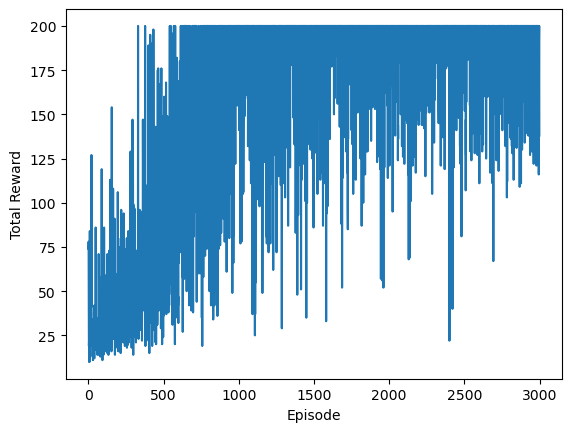

In [34]:
# [그림 9-4] 에피소드별 보상 합계 추이
from common.utils import plot_total_reward
plot_total_reward(reward_history)

update()메서드는 에이전트가 목표에 도달했을 때 호출된다고 했습니다. self.memory는 리스트이며, 에이전트가 얻은 보상(reward)과 행동의 확률(prob)을 순서대로 담고 있습니 다. 이번 코드에서는 self.memory의 원소들을 뒤쪽부터 거꾸로 따라가면서 각 시각의 G를 구해 손실 함수를 바로 갱신합니다.  

이제 REINFORCE를 실행해보죠. 코드를 한 번만 실행했을 때와 100번을 평균한 그래프를 함 께 보겠습니다.

<p align="center"><img src="./images/fig_09_04.png" width=800></p>

에피소드가 거듭될수록 보상 총합이 커지고 있습니다. 더구나 이번에는 상한이 200에 상당히 가까워졌습니다. 앞 절의 결과보다 훨씬 안정적이고 빠르게 학습됨을 알 수 있습니다.

In [36]:
for i in range(5):
    # 학습이 끝난 에이전트 렌더링
    env = gym.make('CartPole-v0', render_mode='human')
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)  # 행동 선택
        next_state, reward, terminated, truncated, info = env.step(action)  # 행동 수행
        done = terminated | truncated

        agent.add(reward, prob)  # 보상과 행동의 확률을 에이전트에 추가
        state = next_state       # 상태 전이
        total_reward += reward   # 보상 총합 계산

    env.close()
    print('Total Reward:', total_reward)

Total Reward: 116.0
Total Reward: 189.0
Total Reward: 200.0
Total Reward: 136.0
Total Reward: 191.0


## 9.3 베이스 라인

다음으로 REINFORCE를 개선하는 베이스라인 baseline 기술을 소개합니다. 먼저 간단한 예를 들 어 아이디어를 설명하고 이어서 REINFORCE에 베이스라인을 적용해보겠습니다.

### 9.3.1 베이스라인 아이디어

A, B, C라는 세 사람이 시험을 치렀고 각각 90점, 40점, 50점을 받았습니다.

<p align="center"><img src="./images/fig_09_05.png" width=300></p>

시험 성적의 분산을 구해보죠. 넘파이를 사용하면 다음과 같이 구할 수 있습니다.

In [37]:
import numpy as np
x = np.array([90, 40, 50])
print(np.var(x))

466.6666666666667


결과에서 보듯이 시험 성적의 분산은 466.6666666666666666667로, 큰 값입니다. 분산은 '데이터의 흩어진 정도를 나타내므로 점수의 편차가 심하다는 뜻입니다. 이 분산을 줄일 방법 을 생각해봅시다.  

이전 시험 성적들을 이용해볼 수 있습니다. 예를 들어 지금까지의 시험 성적이 [그림 9-6]과 같았다고 해보죠.

<p align="center"><img src="./images/fig_09_06.png" width=600></p>

이와 같이 이전 시험들의 성적이 주어지면 다음 시험의 점수를 예측할 수 있습니다. 간단한 방법으로는 이전 시험들의 평균을 내는 방법이 있습니다. 다음 시험 성적은 지금까지의 평균과 같을거라고 예측하는 것입니다.  

[그림 9-6]의 결과를 각각 평균하면 A는 82점, B는 46점, C는 49점이라고 가정해봅시다. 이를 '예측값'으로 사용하여 다음 시험의 실제 결과와 얼마나 차이가 나는지 보겠습니다.

<p align="center"><img src="./images/fig_09_07.png" width=600></p>

이제 [그림 9-7]의 차이에서 분산을 구해봅시다.

In [38]:
x = np.array([90, 40, 50])
avg = np.array([82, 46, 49])
diff = x - avg # [8, -6, 1]
print(np.var(diff))

32.666666666666664


분산은 32.666으로 처음과 비교하면 정말 많이 줄었습니다. 이 예에서 알 수 있듯이 어떤 결과에서 예측값을 빼면 분산을 줄일 수 있습니다. 예측값의 정확도가 높을수록 분산은 작아집니다. 이것이 바로 베이스라인 기법의 아이디어입니다. 지금 예에서는 평균을 베이스라인으로 이용했습니다.

다음 절에서는 베이스라인을 REINFORCE에 적용하겠습니다.

### 9.3.2 베이스라인을 적용한 정책 경사법

REINFORCE는 [식 9.3]으로 표현됩니다. 여기에 베이스라인을 적용하면 [식 9.4]가 됩니다.

<p align="center"><img src="./images/eq_09_04.png" width=800></p>

[식 9.4]에서는 $G_t$대신 $G_t - b(S_t)$를 사용했습니다. 여기서 $b(S_t)$는 임의의 함수입니다. 즉, $b(S_t)$라는 함수는 입력이 $S_t$이기만 하면 어떤 함수라도 상관없다는 뜻입니다. 이 $b(S_t)$가 베이스라인입니다.

> NOTE_ [식 9.3]에서 [식 9.4]로의 변형이 성립한다는 증명은 부록 D.2절에서 다룹니다. 관심 있는 분은 참고하기 바랍니다.

예를 들어 상태 $S_t$에서 지금까지 얻은 보상의 평균을 $b(S_t)$로 사용할 수 있습니다. 앞 절의 시험 성적 예가 여기 해당하죠. 그리고 실무에서는 가치 함수를 많이 사용합니다. 수식으로 쓰면 $b(S_t)=V_{\pi_\theta}(S_t)$가 되죠. 베이스라인을 적용하여 분산을 줄일 수 있다면 학습 시 샘플 효율이 좋아집니다.

참고로 베이스라인으로 가치 함수를 사용하면 실제 가치 함수 $v_{\pi_\theta}(S_t)$를 알 수 없습니다. 이 경우 가치 함수에 대해서도 학습해야 합니다.  

마지막으로 베이스라인을 사용하는 이유를 직관적으로 보여주는 설명을 덧붙이겠습니다. <카트폴>에서 [그림 9-8]처럼 막대가 균형을 잃은 상태를 생각해봅시다.

<p align="center"><img src="./images/fig_09_08.png" width=600></p>

막대가 균형을 잃어 게임이 끝나기 직전입니다. 이 상태에서는 어떤 행동을 선택하든 몇 단계 후에 게임이 종료됩니다.  

그림의 상태를 s, 이 상태에서의 행동을 a라고 하죠. 그리고 상태 s에서 몇 단계 후, 예를 들어 3단계 후에는 반드시 게임이 끝난다고 가정합시다. 그러면 상태 s에서의 수익은 3이 됩니다(할인율 $\gamma$를 1로 가정).

이 조건에서 기본적인 REINFORCE라면, 상태 s에서 행동 a는 가중치 3만큼 강화됩니다(상태 s에서 행동 a가 선택될 확률이 커짐). 하지만 어떤 행동을 하든 3단계 후에는 반드시 게임이 끝나기 때문에 행동 a가 선택될 확률을 높이는 건 아무런 의미가 없는 일입니다.  

이때 베이스라인이 등장합니다. 베이스라인으로 가치 함수를 사용하고 [그림 9-8]의 예에서 $V_{\pi_0}(s) = 3$ 임을 알고 있다고 가정하죠(실제로는 몬테카를로법이나 TD법 등으로 학습하여 추정해야 합니다). 그렇다면 가중치는 $G - V_{\pi_0}$ 이므로 결국 0입니다. 가중치가 0이므로 어떤 행동을 선택하든 그 행동이 선택될 확률은 커지지도 작아지지도 않습니다. 이처럼 베이스라인을 적용하면 학습 과정에서의 낭비를 줄일 수 있습니다.

## 9.4 행위자-비평자

강화 학습 알고리즘은 크게 가치 기반 기법과 정책 기반 기법으로 나뉩니다. 이번 장에서 지금 까지 살펴본 기법들은 모두 정책 기반 기법이고, 앞 장에서 살펴본 DQN과 SARSA는 가치 기반 기법입니다. 그런데 둘 다를 사용하는 기법, 즉 '가치 기반이자 정책 기반인 기법도 생각해 볼 수 있습니다.

<p align="center"><img src="./images/fig_09_09.png" width=600></p>

앞 절에서 설명한 '베이스라인을 적용한 REINFORCE'에서 베이스라인으로 가치 함수를 사용하면 '가치 기반이자 정책 기반이라고 할 수 있습니다. 이번 절에서는 이 아이디어를 한 걸음 더 발전시켜 행위자-비평자 알고리즘을 도출하겠습니다. 행위자-비평자 역시 '가치 기반이자 정책 기반의 기법입니다.

### 9.4.1 행위자-비평자 도출

먼저 '베이스라인을 적용한 REINFORCE'를 복습해보죠. 이 기법에서 목적 함수의 기울기는 다음 식으로 표현됩니다.

<p align="center"><img src="./images/eq_09_04_1.png" width=800></p>

[식 9.4]에서 $G_t$는 수익, $b(S_t)$는 베이스라인을 나타냅니다. 베이스라인은 임의의 함수를 사용할 수 있습니다. 이번 절에서는 신경망으로 모델링한 가치 함수를 베이스라인으로 사용합니다. 이를 위해 다음 기호들을 새롭게 사용합니다.

- $w$: 가치 함수를 나타내는 신경망의 모든 가중치 매개변수
- $V_w(S_t)$ : 가치 함수를 모델링한 신경망

그러면 목적 함수의 기울기는 다음 식으로 표현됩니다.

<p align="center"><img src="./images/eq_09_05.png" width=800></p>

[식 9.5]에는 문제가 하나 있습니다. 수익 G는 목표에 도달해야 비로소 정해진다는 문제입니다. 즉, 목표에 도달하기 전까지는 정책이나 가치 함수를 갱신할 수 없습니다. 사실 몬테카를로 법에 기초한 기법 모두에 해당하는 단점이죠. 이 단점을 해결한 기법이 6장에서 다룬 TD법입 니다. TD법으로 가치 함수를 학습하면 [그림 9-10]과 같이 1단계 후(또는 2단계 후)의 결과 를 이용하여 갱신할 수 있습니다.

<p align="center"><img src="./images/fig_09_10.png" width=600></p>

그림과 같이 가치 함수 $V_w(S_t)$를 학습할 때 몬테카를로법에서는 수익 $G_t$를 사용합니다. 한편 TD법에서는 $R_t + \gamma V_w(S_{t+1})$을 사용합니다.  
> NOTE_ 가치 함수를 신경망으로 모델링하면 $V_w(S_t)$의 값이 $R_t + \gamma V_w(S_{t+1})$에 가까워지도록 학습합 니다. 구체적으로는 설명하면, $V_w(S_t)$와 $R_t + \gamma V_w(S_{t+1})$의 평균제곱오차를 손실 함수로 사용하여 경사하강법으로 신경망의 가중치를 갱신합니다.

이제 몬테카를로법에 기반한 [식 9.5]를 TD법으로 바꿔보죠. 이를 위해 $G_t$ 대신 $R_t + \gamma V_w(S_{t+1})$을 사용하면 다음 식이 만들어집니다.

<p align="center"><img src="./images/eq_09_06.png" width=800></p>

[식 9.6]에 기반한 방법이 바로 행위자-비평자 Actor-Critic입니다. 여기서 정책 $\pi_\theta$와 가치 함수 $V_w$는 모두 신경망이며 이 두 신경망을 병렬로 학습시킵니다. 정확하게는 정책 $\pi_\theta$는 [식 9.6]에 따라 학습시키고, 가치 함수 $V_w$는 TD법에 따라 $V_w(S_t)$의 값이 $R_t + \gamma V_w(S_{t+1})$에 가까워 지도록 학습시킵니다.

> NOTE_ 행위자-비평자의 '행위자'는 정책 에 해당하고, '비평자'는 가치 함수 $V_w$에 해당합니다. 즉, 행위자가 정책에 따라 선택한 행동의 좋은 정도를 비평자가 $V_w$를 기준으로 평가한다는 뜻입니다.

### 9.4.2 행위자-비평자 구현

먼저 정책 신경망과 가치 함수 신경망의 코드를 보겠습니다.

In [45]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class PolicyNet(Model):  # 정책 신경망
    def __init__(self, action_size=2):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = F.softmax(x)  # 확률 출력
        return x


class ValueNet(Model):  # 가치 함수 신경망
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

PolicyNet 클래스가 정책이고, ValueNet 클래스가 가치 함수입니다. 정책의 최종 출력은 소프트맥스 함수의 출력이므로 '확률'입니다.

다음은 Agent 클래스입니다.

In [46]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr_pi = 0.0002
        self.lr_v = 0.0005
        self.action_size = 2

        self.pi = PolicyNet()
        self.v = ValueNet()
        self.optimizer_pi = optimizers.Adam(self.lr_pi).setup(self.pi)
        self.optimizer_v = optimizers.Adam(self.lr_v).setup(self.v)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]  # 선택된 행동과 해당 행동의 확률 반환

    def update(self, state, action_prob, reward, next_state, done):
        # 배치 처리용 축 추가
        state = state[np.newaxis, :]
        next_state = next_state[np.newaxis, :]

        # 가치 함수(self.v)의 손실 계산
        target = reward + self.gamma * self.v(next_state) * (1 - done)  # TD 목표
        target.unchain()
        v = self.v(state)  # 현재 상태의 가치 함수
        loss_v = F.mean_squared_error(v, target)  # 두 값의 평균 제곱 오차

        # 정책(self.pi)의 손실 계산
        delta = target - v
        delta.unchain()
        loss_pi = -F.log(action_prob) * delta

        # 신경망 학습
        self.v.cleargrads()
        self.pi.cleargrads()
        loss_v.backward()
        loss_pi.backward()
        self.optimizer_v.update()
        self.optimizer_pi.update()

episode :0, total reward : 11.0
episode :100, total reward : 9.0
episode :200, total reward : 12.0
episode :300, total reward : 23.0
episode :400, total reward : 129.0
episode :500, total reward : 200.0
episode :600, total reward : 75.0
episode :700, total reward : 159.0
episode :800, total reward : 159.0
episode :900, total reward : 125.0
episode :1000, total reward : 200.0
episode :1100, total reward : 200.0
episode :1200, total reward : 200.0
episode :1300, total reward : 200.0
episode :1400, total reward : 200.0
episode :1500, total reward : 200.0
episode :1600, total reward : 200.0
episode :1700, total reward : 200.0
episode :1800, total reward : 200.0
episode :1900, total reward : 200.0
episode :2000, total reward : 200.0
episode :2100, total reward : 200.0
episode :2200, total reward : 200.0
episode :2300, total reward : 200.0
episode :2400, total reward : 200.0
episode :2500, total reward : 167.0
episode :2600, total reward : 143.0
episode :2700, total reward : 200.0
episode :2

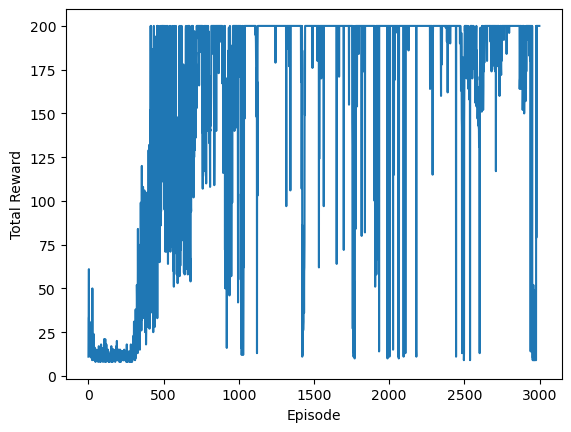

In [47]:
episodes = 3000
env = gym.make('CartPole-v0', render_mode='rgb_array')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        agent.update(state, prob, reward, next_state, done)

        state = next_state
        total_reward += reward

    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

# [그림 9-11] 에피소드별 보상 합계 추이
from common.utils import plot_total_reward
plot_total_reward(reward_history)

get_action() 메서드는 정책에 따른 행동을 선택해줍니다. 주의할 점이 하나 있습니다. 신경 망에 입력되는 데이터는 미니배치로 처리되기 때문에, 데이터(상태) 하나를 처리할 때는 축을 하나 추가하여 배치로 처리할 때와 같은 형상으로 만들어야 합니다. 코드 1이 이 작업을 해줍 니다. 또한 이 메서드는 선택된 행동과 그 확률을 함께 반환합니다. 행동이 선택될 확률은 나중 에 손실 함수를 계산할 때 쓰입니다.  

update()메서드에서는 가치 함수와 정책을 학습합니다. 코드의 2에서는 가치 함수(self.v) 에 대한 손실을 구합니다. TD 목표를 계산하고(target), 현재 상태의 가치 함수(v)와의 평균 제곱오차를 구합니다. 다음으로 3에서는 정책(self.pi)에 대한 손실을 구합니다. [식 9.6]에 따라 마이너스를 곱한 값이 손실이 됩니다. 나머지는 일반적인 신경망 학습 코드입니다.
에이전트를 움직이는 코드는 지금까지와 같으니 생략하겠습니다. 이 코드를 실행하면 [그림 9-11]의 결과를 얻을 수 있습니다.

<p align="center"><img src="./images/fig_09_11.png" width=800></p>

그림과 같이 학습이 순조롭게 진행됨을 알 수 있습니다.

In [49]:
for i in range(5):
    # 학습이 끝난 에이전트 렌더링
    env = gym.make('CartPole-v0', render_mode='human')
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)  # 행동 선택
        next_state, reward, terminated, truncated, info = env.step(action)  # 행동 수행
        done = terminated | truncated

        agent.update(state, prob, reward, next_state, done)

        state = next_state       # 상태 전이
        total_reward += reward   # 보상 총합 계산

    env.close()
    print('Total Reward:', total_reward)

Total Reward: 200.0
Total Reward: 200.0
Total Reward: 200.0
Total Reward: 200.0
Total Reward: 200.0


## 9.5 정책 기반 기법의 장점

그렇다면 지금까지 살펴본 정책 기반 기법들의 장점은 무엇일까요? 대표적으로 다음의 세 가 지를 들 수 있습니다.

1. 정책을 직접 모델링하기 때문에 효율적이다  

우리가 궁극적으로 얻고자 하는 것은 최적 정책입니다. 가치 기반 기법은 가치 함수를 추정하고 이를 바탕으로 정책을 결정합니다. 반면, 정책 기반 기법은 정책을 '직접' 추정합니다. 문제에 따라서는 가치 함수의 형태가 복잡한 반면, 최적 정책은 단순할 수 있습니다. 이런 경우 정책 기반 기법이 더 빠르게 학습하리라 기대할 수 있습니다.

2. 연속적인 행동 공간에서도 사용할 수 있다  

지금까지 살펴본 강화 학습 문제들은 모두 행동 공간이 이산적이라고 가정했습니다. 예를 들어 <카트 폴>은 왼쪽과 오른쪽 중 하나의 행동을 선택합니다. 이러한 이산적 행동 공간에서는 (연속적이지 않은) 몇 가지 후보 중 하나의 행동을 선택합니다.
한편, 연속적인 행동 공간도 생각할 수 있습니다. 예를 들어 OpenAI Gym의 〈Pendulum시계 추>은 막대의 중앙에 회전력 torque: 토크을 가해 막대를 들어 올리는 과제입니다. 이 과제에서의 행 동은 '회전력을 어느 정도 세기로 가할 것인가'가 되며, 그 값은 가령 2.05 나 -0.24 등의 연속적인 값이 될 수 있습니다.

<p align="center"><img src="./images/fig_09_12.png" width=400></p>

가치 기반 기법은 행동 공간이 연속적이면 적용하기 어려워집니다. 몇 가지 방법을 생각해볼 수 있는데, 그중 하나가 연속적인 행동 공간을 이산화하는 것입니다. 그러나 어떻게 이산화할 것인가(양자화 quantization*)는 어려운 문제이며, 적합한 방법은 과제에 따라 다릅니다. 대부분의 문제에서는 적합한 이산화 방법을 시행착오를 거쳐 찾아내야 합니다.

반면, 정책 기반 기법은 연속적인 행동 공간에도 간단하게 대응할 수 있습니다. 예를 들어 신경 망의 출력이 정규분포라고 한다면 신경망은 정규분포의 평균과 분산을 출력할 수 있습니다. 그 평균과 분산을 바탕으로 샘플링하면 연속적인 값을 얻을 수 있습니다.

<p align="center"><img src="./images/fig_09_13.png" width=500></p>

3. 행동이 선택될 확률이 부드럽게 변화한다

가치 기반 기법에서 에이전트는 주로 $\epsilon$-탐욕 정책에 따라 행동합니다. 그렇다면 기본적으로 Q 함수의 값이 가장 큰 행동이 선택되죠. 이때 Q 함수가 갱신되면서 값이 최대가 되는 행동이 바뀌면 행동하는 방식도 급격하게 달라집니다. 반면, 정책 기반 기법에서는 각 행동의 확률이 소프트맥스 함수에 의해 정해집니다. 따라서 정책의 매개변수를 갱신하는 과정에서 각 행동의 확률이 부드럽게 변화합니다. 이 덕분에 정책 경사법의 학습이 안정적으로 이루어질 수 있습 니다.  

이상이 정책 기반 기법의 장점입니다. 하지만 정책 기반 기법이 항상 좋은 것은 아니니 주의해 야 합니다. 과제에 따라 더 잘하기도 혹은 못하기도 하죠. 또한 정책 기반이든 가치 기반이든 매우 다양한 구현 알고리즘이 존재합니다. 그래서 알고리즘을 선택할 때는 이러한 점을 잘 고 려해야 합니다.

## 9.6 정리

이번 장에서는 정책 기반 기법인 정책 경사법을 공부했습니다. 총 네 가지 정책 경사법 알고리
즘을 배웠는데, 다음처럼 하나의 수식으로 통일하여 표현할 수 있습니다.

<p align="center"><img src="./images/eq_09_07.png" width=800></p>


이상의 네 가지 기법은 가중치인 $\Phi_t$에서 차이가 납니다. 가장 간단한 정책 경사법은 모든 시간에서 가중치가 $G(\tau)$입니다. 이를 개선하여 시간에서의 가중치를 수익 $G_t$로 평가하는 것이 REINFORCE 입니다. 여기에 베이스라인 기법을 추가하여 분산을 줄인 것이 '베이스라인을 적용한 REINFORCE'입니다. 네 번째의 행위자-비평자는 정책 외에 가치 함수도 신경망으로 모델링하는 기법입니다. 1번에서 4번으로 갈수록 고도화되며 더 나은 결과를 기대할 수 있습 니다.


이 기법들 말고도 다음과 같이 Q 함수를 사용할 수도 있습니다(Q 함수를 사용해도 등식이 성 립한다는 증명은 다른 문헌을 참고하기 바랍니다).

<p align="center"><img src="./images/eq_09_07_1.png" width=400></p>

또한 가치 함수를 베이스라인으로 사용하면 1 를 다음 식처럼 설정할 수 있습니다.

<p align="center"><img src="./images/eq_09_07_2.png" width=400></p>

이처럼 Q 함수에서 가치 함수를 뺀 값, 즉 어드밴티지 함수를 사용할 수 있습니다(어드밴티지 함수는 8.4.3절 참고).